In [1]:
import numpy as np

np.random.seed(42)  # Fijamos una semilla para reproducibilidad
n = 200
ruido = 0.2
theta = np.random.uniform(low=0, high=2*np.pi, size=n)
r = np.random.normal(loc=1, scale=ruido, size=n)
x = r * np.cos(theta)
y = r * np.sin(theta)
datos = np.column_stack((x, y))

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Creamos un diccionario para guardar los resultados
resultados = {}

# Prueba 1: R = 0.5
cluster_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=0.5)
cluster_model.fit(datos)
resultados[0.5] = len(set(cluster_model.labels_))

# Prueba 2: R = 1
cluster_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=1)
cluster_model.fit(datos)
resultados[1] = len(set(cluster_model.labels_))

# Prueba 3: R = 0.02
cluster_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='complete', distance_threshold=0.02)
cluster_model.fit(datos)
resultados[0.02] = len(set(cluster_model.labels_))

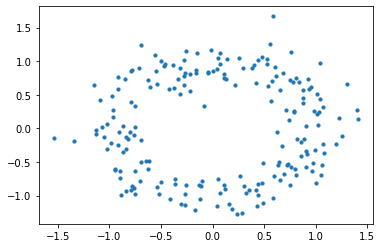

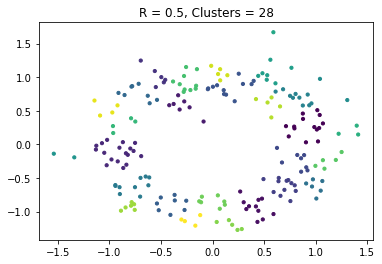

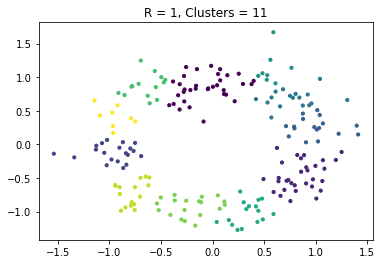

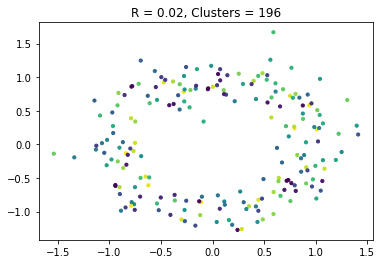

In [4]:
import matplotlib.pyplot as plt

# Graficamos los datos
plt.scatter(datos[:,0], datos[:,1], s=10)

# Graficamos los resultados
for r, n_clusters in resultados.items():
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    cluster_model.fit(datos)
    plt.figure()
    plt.title(f"R = {r}, Clusters = {n_clusters}")
    plt.scatter(datos[:,0], datos[:,1], c=cluster_model.labels_, s=10)
    plt.show()